<a href="https://colab.research.google.com/github/martinan92/BI-Project/blob/master/Copy_of_Copy_of_ML_Project_(Group_0_1_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Group Project

## Data Load and Exploratory Analysis

In [0]:
#Need to download vecstack in environment
# @misc{vecstack2016,
#        author = {Igor Ivanov},
#        title = {Vecstack},
#        year = {2016},
#        publisher = {GitHub},
#        howpublished = {\url{https://github.com/vecxoz/vecstack}},
# }

import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from dateutil.parser import parse
from sklearn.exceptions import ConvergenceWarning
import statistics as stat
import numpy as np
import pandas as pd
import Helper_Function as hf #File with custom-built functions
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import classification_report, roc_curve
from sklearn.decomposition import PCA
from vecstack import StackingTransformer
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

#Set needed file paths
file_path_1 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Labels.csv'
file_path_2 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Train.csv'
file_path_3 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/test.csv'

#Load labels, train data and test data
labels = hf.read_data(file_path_1)
raw_df = hf.read_data(file_path_2)
raw_test_df = hf.read_data(file_path_3)

#External Data
pop_df = pd.read_excel('External_features.xls', sheet_name = 0)
weather_df = pd.read_excel('External_features.xls', sheet_name = 1)

raw_df.describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1898,NaN,2146,NaN,NaN,37400,NaN,...,7,8,6,5,5,10,7,3,7,6
top,NaN,NaN,3/15/11,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Parse date 
raw_df['date_recorded'] = pd.to_datetime(raw_df['date_recorded'])
raw_df['Year'], raw_df['Month'], raw_df['Day'], raw_df['Day_of_Week'] = raw_df['date_recorded'].dt.year, raw_df['date_recorded'].dt.month,raw_df['date_recorded'].dt.day,raw_df['date_recorded'].dt.weekday

raw_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Year,Month,Day,Day_of_Week
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,14,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,6,2
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,2,25,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,1,28,0
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,7,13,2


In [0]:
pop_df.head()

,Name,Abbr.,Status,Capital,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016
0,Tanzania,TZA,Rep,Dodoma,885803,34443603,44928923,0.304420,50.721123,50144200
1,Arusha,ARU,Reg,Arusha,37576,1288088,1694310,0.315368,45.090217,1890700
2,Dar es Salaam,DAR,Reg,Dar es Salaam,1393,2487288,4364541,0.754739,3133.195262,5465400
3,Dodoma,DOD,Reg,Dodoma,41311,1692025,2083588,0.231417,50.436639,2264500
4,Geita,GEI,Reg,Geita,20054,1337718,1739530,0.300371,86.742296,1932200


In [0]:
weather_df.head()

,Month_num,Month,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,1,January,18.6,29.4,10,133.7
1,2,February,18.6,29.4,9,144.5
2,3,March,18.3,29.0,7,113.9
3,4,April,17.9,28.7,5,57.8
4,5,May,16.5,28.0,1,5.3


In [0]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 44 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null datetime64[ns]
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null 

In [0]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [0]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
Name                    27 non-null object
Abbr.                   27 non-null object
Status                  27 non-null object
Capital                 27 non-null object
Area_KM2                27 non-null int64
Population2002          27 non-null int64
Population2012          27 non-null int64
Increase 2002 - 2012    27 non-null float64
Pop_Density2012         27 non-null float64
Population2016          27 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 2.2+ KB


In [0]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
Month_num        12 non-null int64
Month            12 non-null object
Temp_Min         12 non-null float64
Temp_max         12 non-null float64
rainy_days       12 non-null int64
total_rain_mm    12 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 656.0+ bytes


In [0]:
initial_df = pd.merge(labels, raw_df, how = 'inner', on ='id') 
initial_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Year,Month,Day,Day_of_Week
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,14,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,6,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,2,25,0
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,1,28,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,7,13,2


In [0]:
combined_df = pd.merge(initial_df, pop_df, how = 'left', left_on = 'region', right_on = 'Name')
combined_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,Name,Abbr.,Status,Capital,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,Iringa,IRI,Reg,Iringa,35503,840404,941238,0.119983,26.511506,984900
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,Mara,MAR,Reg,Musoma,21760,1363397,1743830,0.279033,80.139246,1924200
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,Manyara,MAY,Reg,Babati,44522,1037605,1425131,0.373481,32.009591,1618000
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,Mtwara,MTW,Reg,Mtwara,16710,1124481,1270854,0.130169,76.053501,1334600
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,Kagera,KAG,Reg,Bukoba,25265,1791451,2458023,0.372085,97.289650,2789600


In [0]:
combined_df = pd.merge(combined_df, weather_df, how = 'left', left_on = 'Month', 
                       right_on = 'Month_num')
combined_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016,Month_num,Month_y,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,941238,0.119983,26.511506,984900,3,March,18.3,29.0,7,113.9
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,1743830,0.279033,80.139246,1924200,3,March,18.3,29.0,7,113.9
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,1425131,0.373481,32.009591,1618000,2,February,18.6,29.4,9,144.5
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,1270854,0.130169,76.053501,1334600,1,January,18.6,29.4,10,133.7
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,2458023,0.372085,97.289650,2789600,7,July,13.6,26.5,0,0.0


In [0]:
hf.null_check(combined_df)

No nulls present.


In [0]:
#Group variables by variable type
nums = hf.numerical_features(combined_df)
cat = hf.categorical_features(combined_df)
bools = hf.boolean_features(combined_df)

print('='*20)
print('Numericals: {:.3f}'.format(len(nums)))
print('Categoricals: {:.3f}'.format(len(cat)))
print('Booleans: {:.3f}'.format(len(bools)))
print('='*20)

Numericals: 25.000
Categoricals: 36.000
Booleans: 2.000


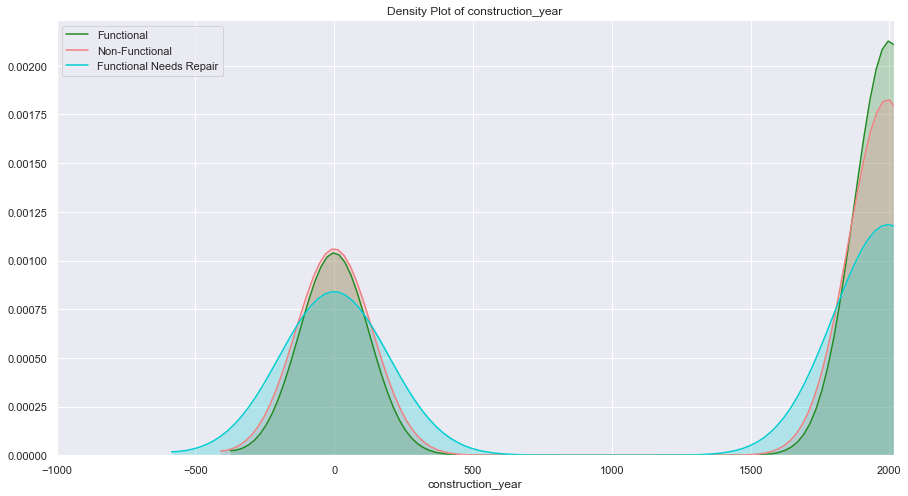

In [0]:
hf.density_plot(combined_df, 'construction_year', lower_bound = -1000, upper_bound = 2015)

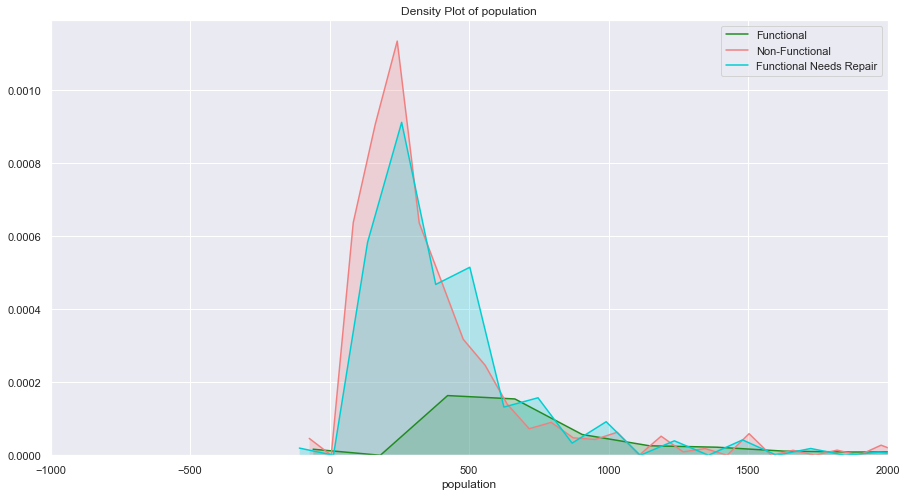

In [0]:
hf.density_plot(combined_df, 'population', lower_bound = -1000, upper_bound = 2000)

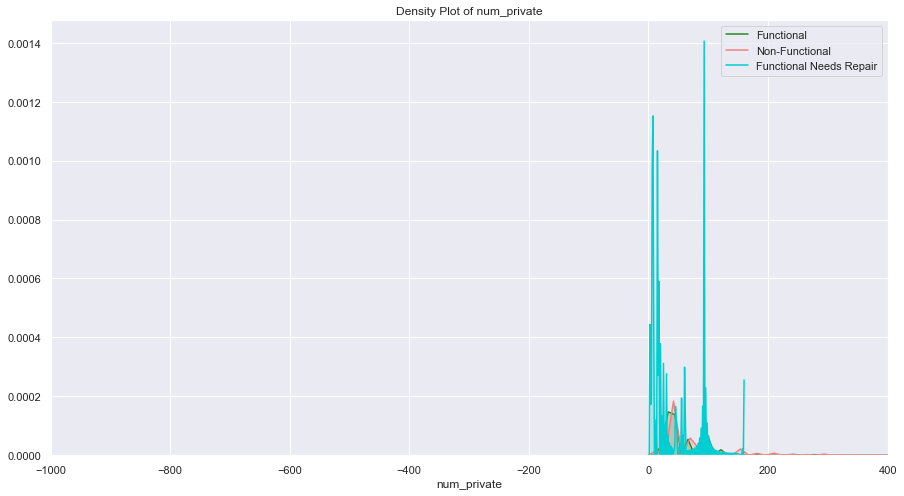

In [0]:
hf.density_plot(combined_df, 'num_private', lower_bound = -100, upper_bound = 400)

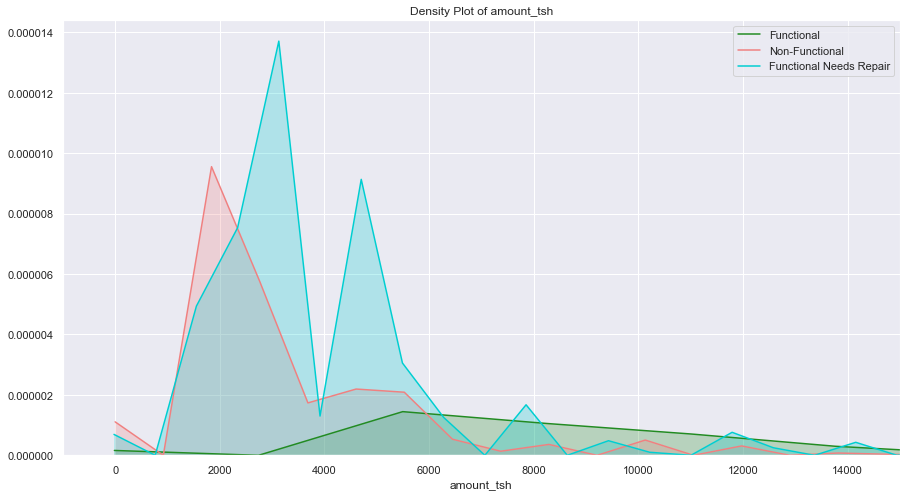

In [0]:
hf.density_plot(combined_df, 'amount_tsh', lower_bound = -1000, upper_bound = 15000)

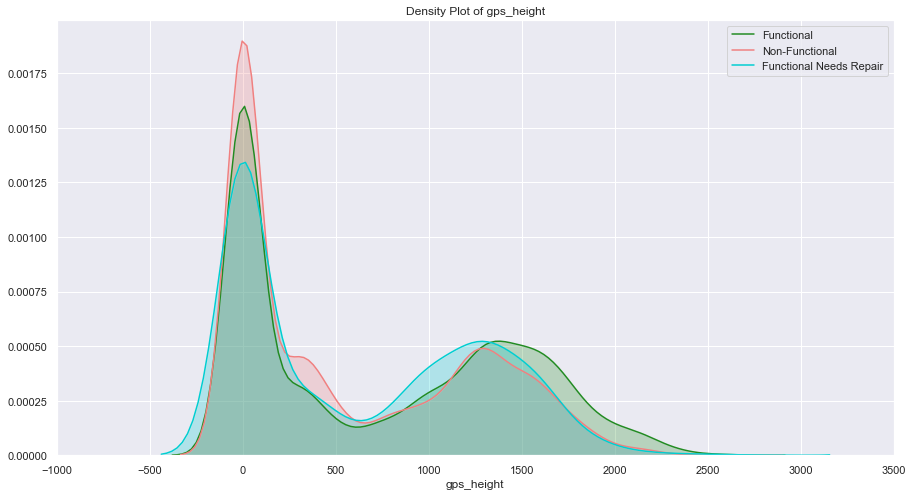

In [0]:
hf.density_plot(combined_df, 'gps_height', lower_bound = -1000, upper_bound = 3500)

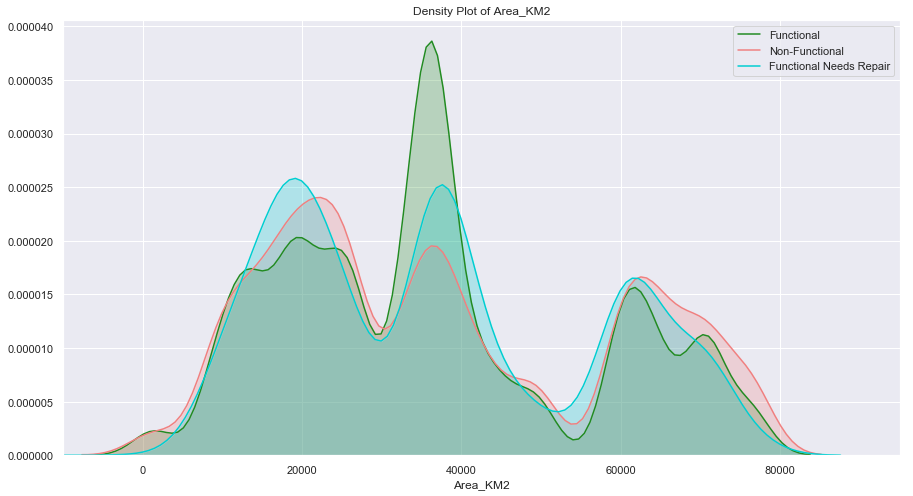

In [0]:
hf.density_plot(combined_df, 'Area_KM2', lower_bound = -10000, upper_bound = 95000)

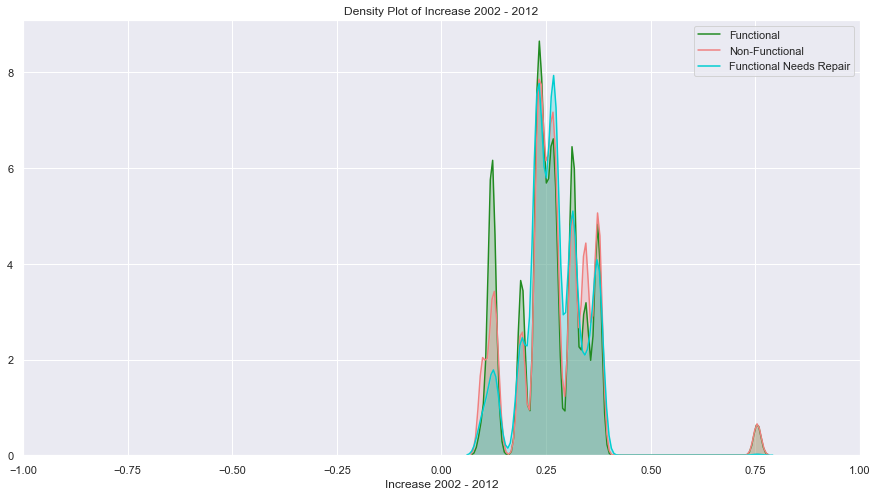

In [0]:
hf.density_plot(combined_df, 'Increase 2002 - 2012', lower_bound = -1, upper_bound = 1)

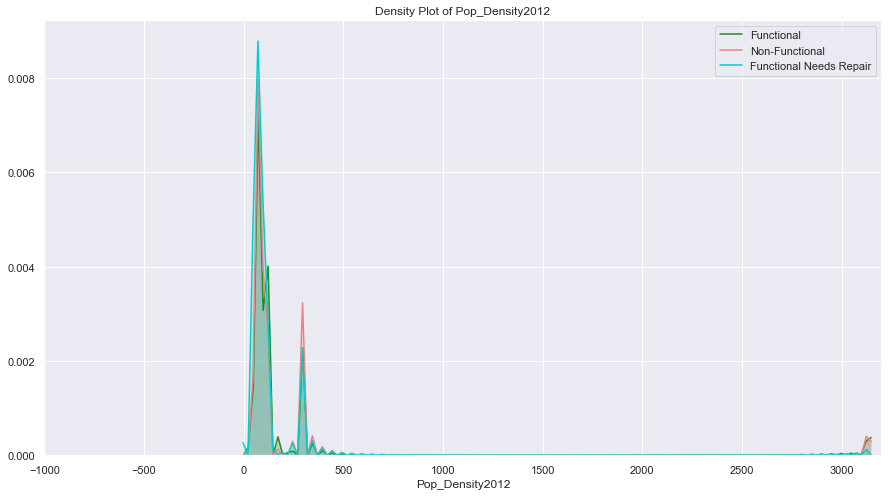

In [0]:
hf.density_plot(combined_df, 'Pop_Density2012', lower_bound = -1000, upper_bound = 3200)

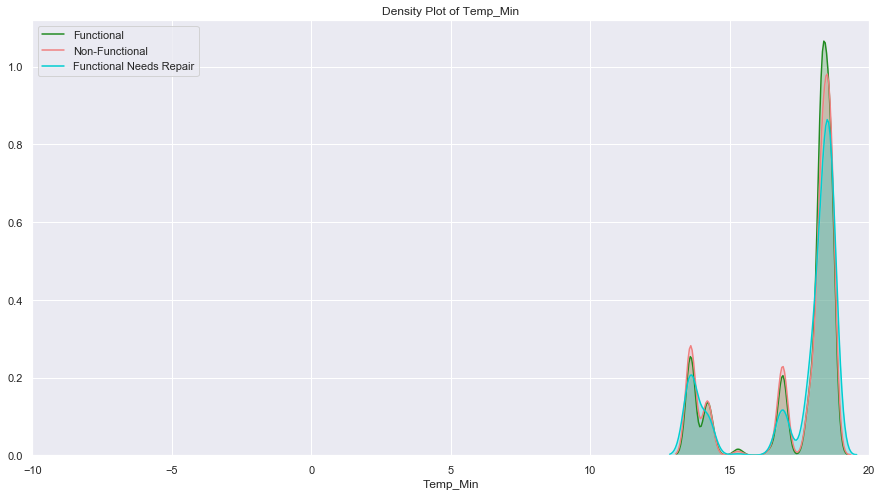

In [0]:
hf.density_plot(combined_df, 'Temp_Min', lower_bound = -10, upper_bound = 20)

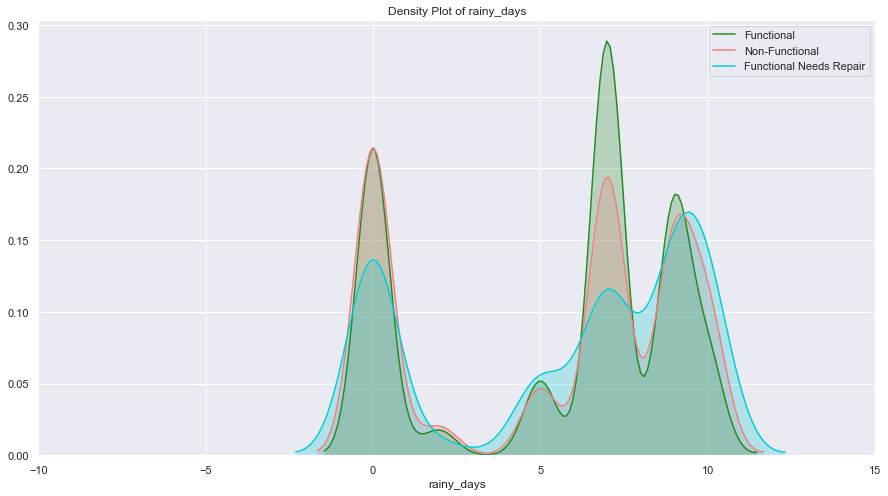

In [0]:
hf.density_plot(combined_df, 'rainy_days', lower_bound = -10, upper_bound = 15)

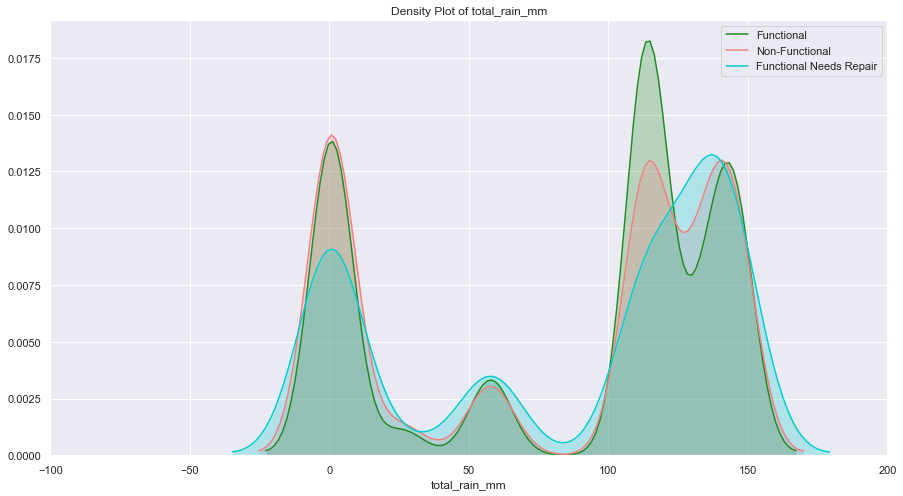

In [0]:
hf.density_plot(combined_df, 'total_rain_mm', lower_bound = -100, upper_bound = 200)

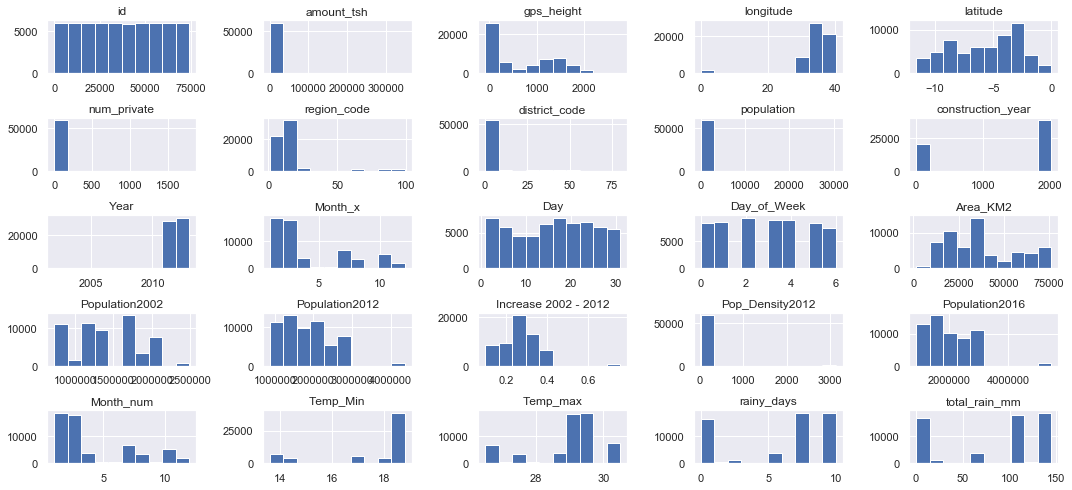

In [0]:
hf.draw_histograms(combined_df, nums, n_rows = 6, n_cols = 5)
scaled_numerics = nums.drop('id')

In [0]:
impute_col = ['amount_tsh', 'population', 'Year', 'construction_year', 'Area_KM2', 'rainy_days', 
              'total_rain_mm']
for col in impute_col:
    combined_df.loc[combined_df[col] < 0, col] = 0
    
combined_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016,Month_num,Month_y,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,941238,0.119983,26.511506,984900,3,March,18.3,29.0,7,113.9
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,1743830,0.279033,80.139246,1924200,3,March,18.3,29.0,7,113.9
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,1425131,0.373481,32.009591,1618000,2,February,18.6,29.4,9,144.5
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,1270854,0.130169,76.053501,1334600,1,January,18.6,29.4,10,133.7
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,2458023,0.372085,97.289650,2789600,7,July,13.6,26.5,0,0.0


In [0]:
up = 20
low = 2

reduced_cat, large_drop, small_drop = hf.drop_categorical(combined_df, cat, upper_bound = up, 
                                                          lower_bound = low)

The following categories have too many unique values: ['Name', 'wpt_name', 'scheme_name', 'funder', 'installer', 'date_recorded', 'subvillage', 'lga', 'ward', 'Abbr.', 'region']
The following categories have too few unique values: ['recorded_by', 'Status']


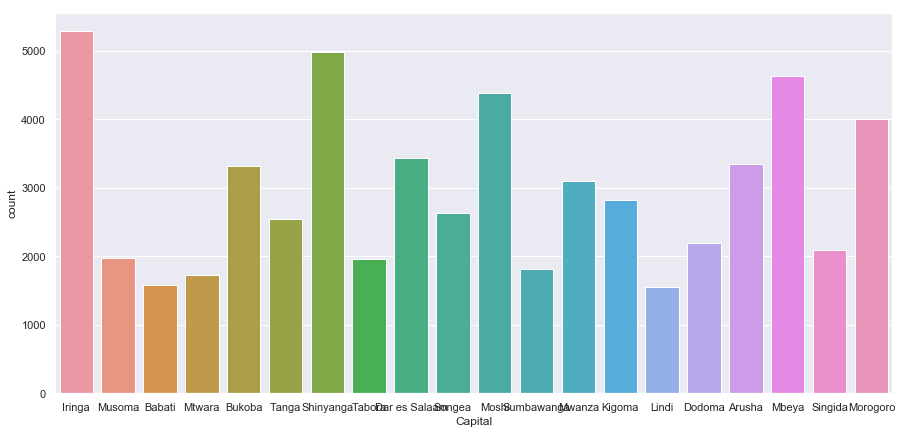

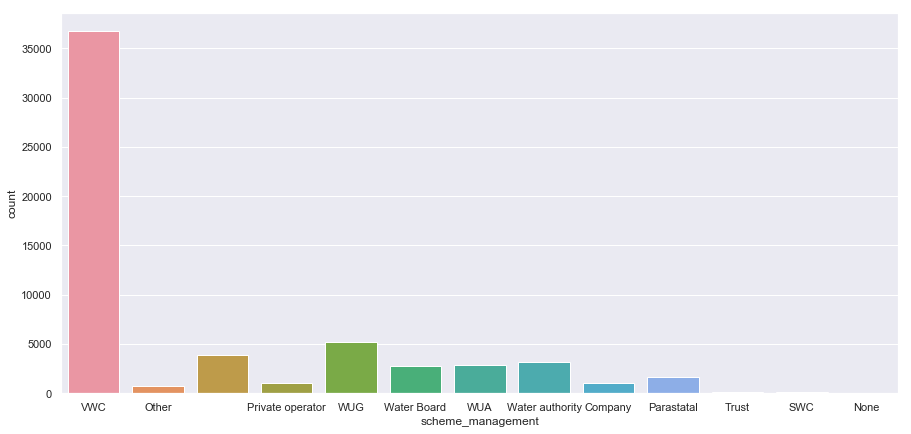

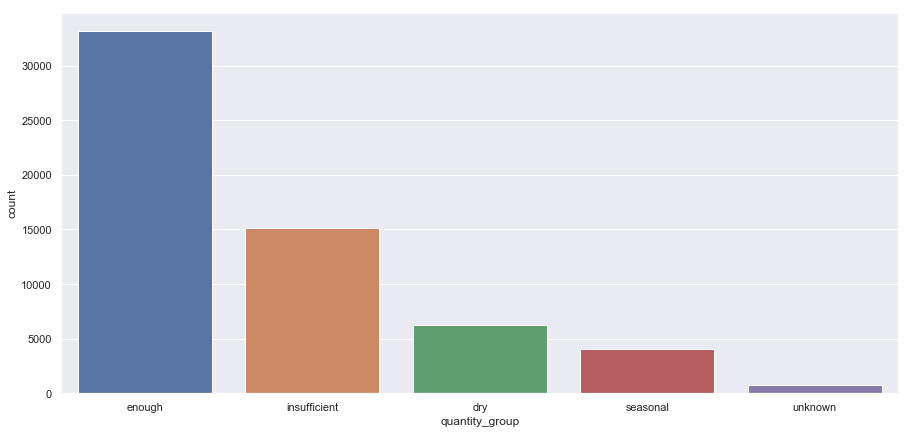

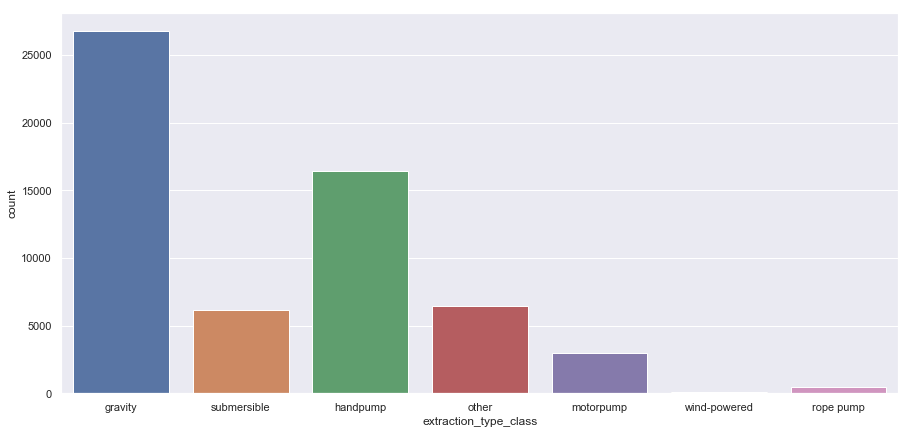

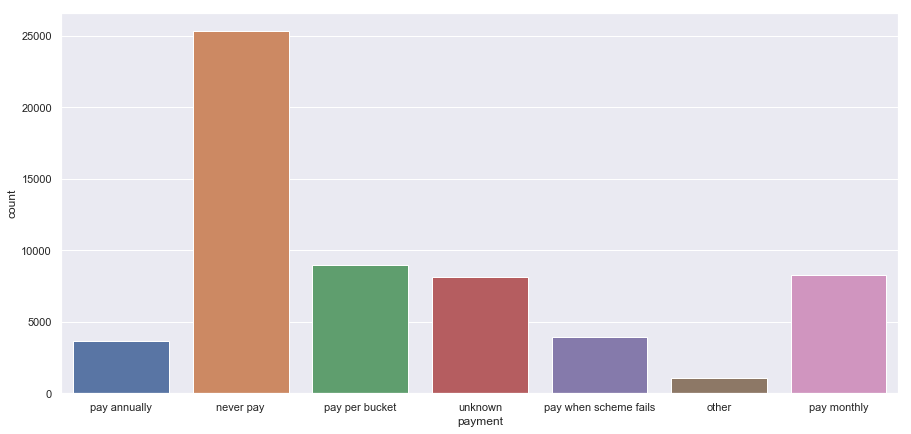

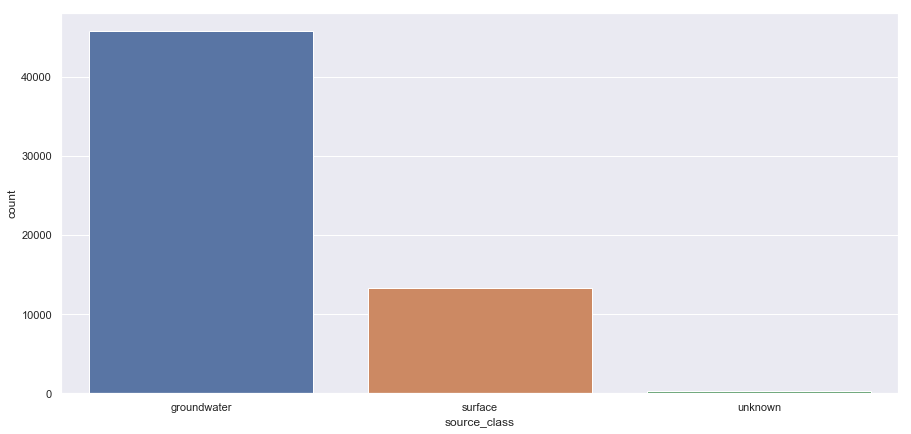

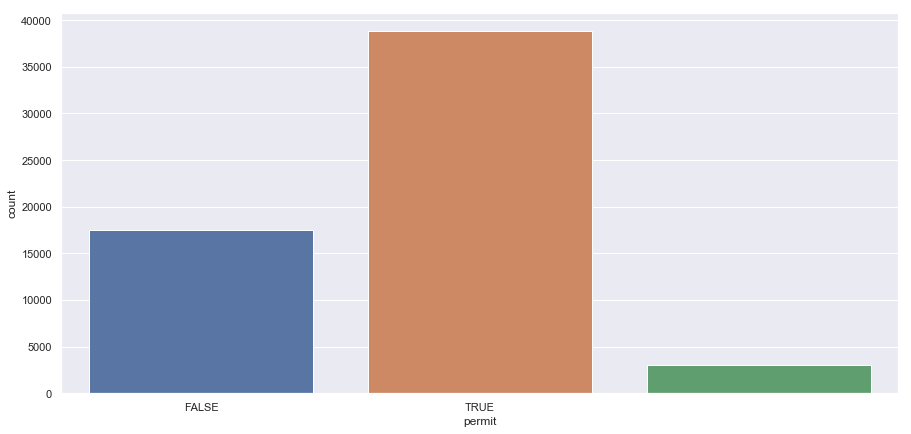

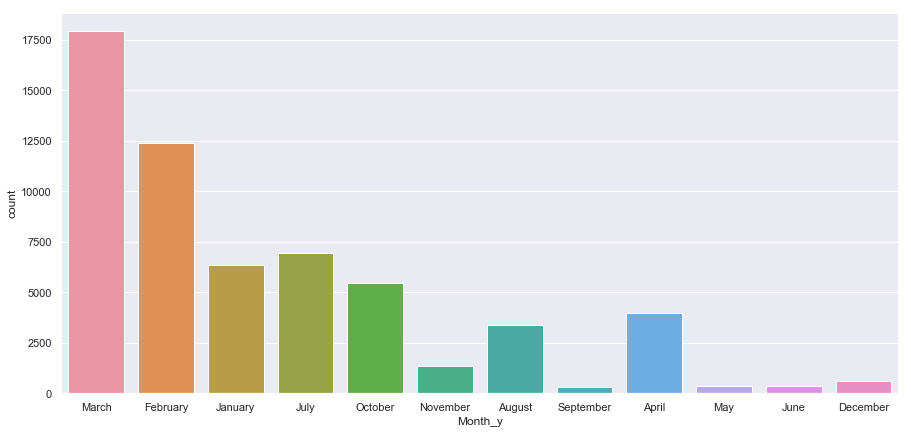

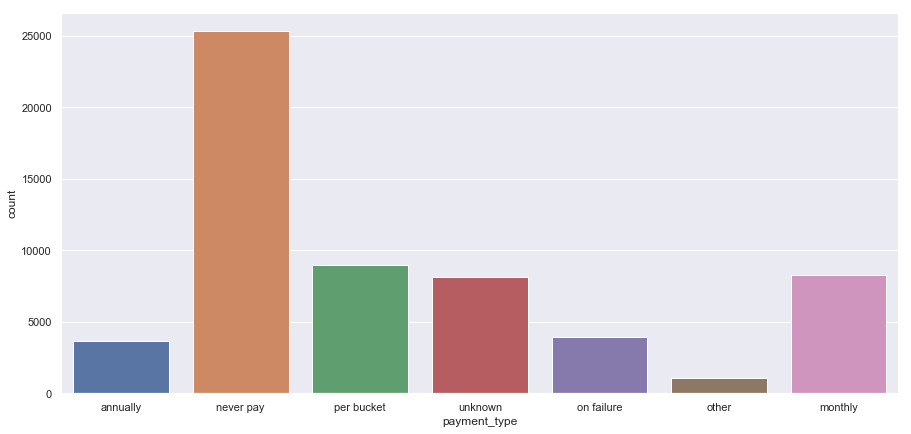

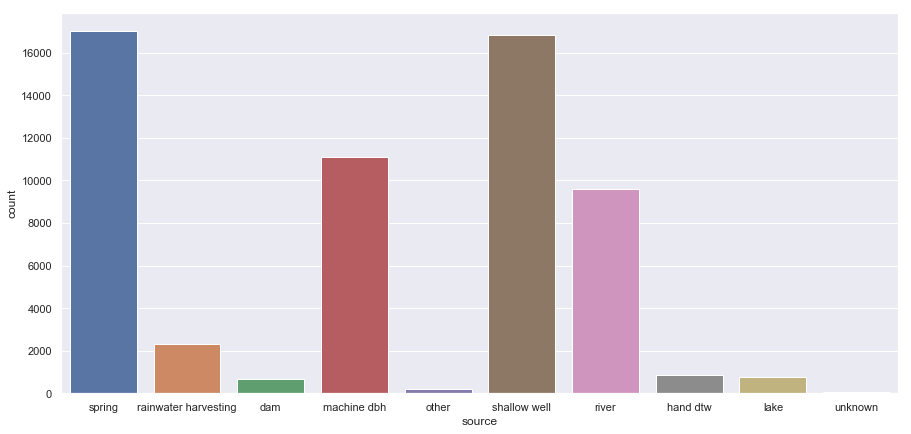

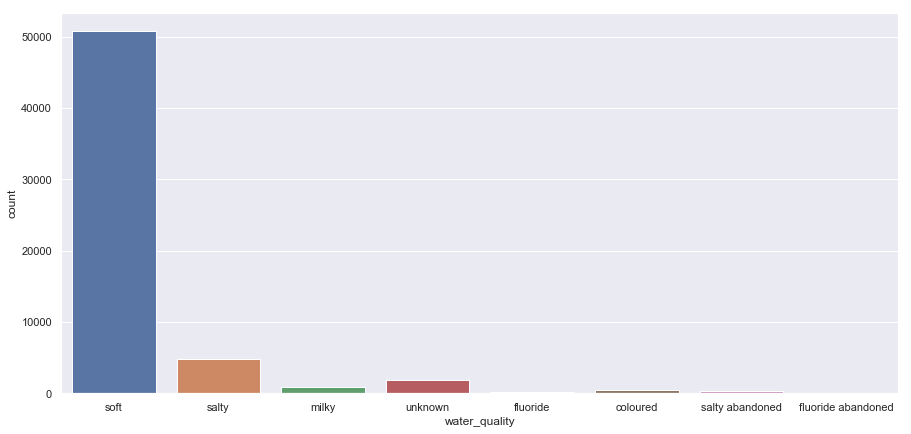

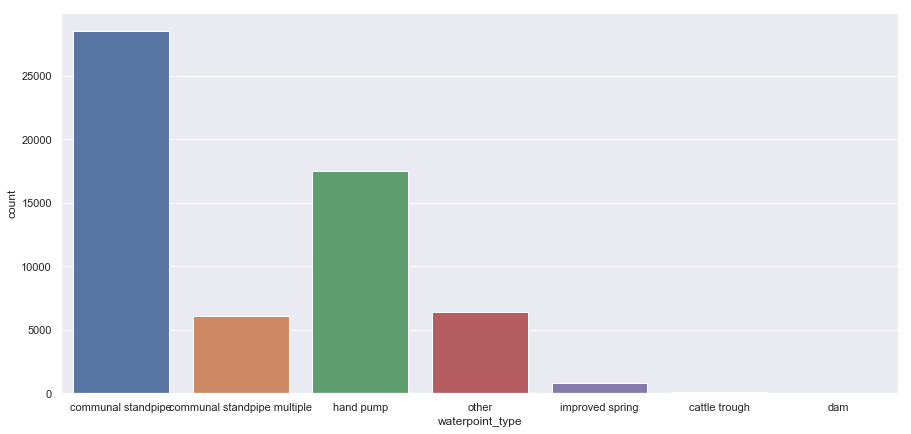

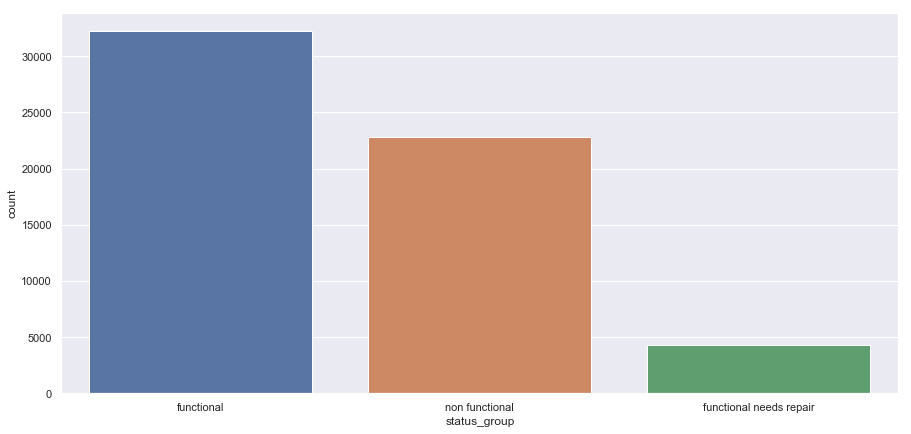

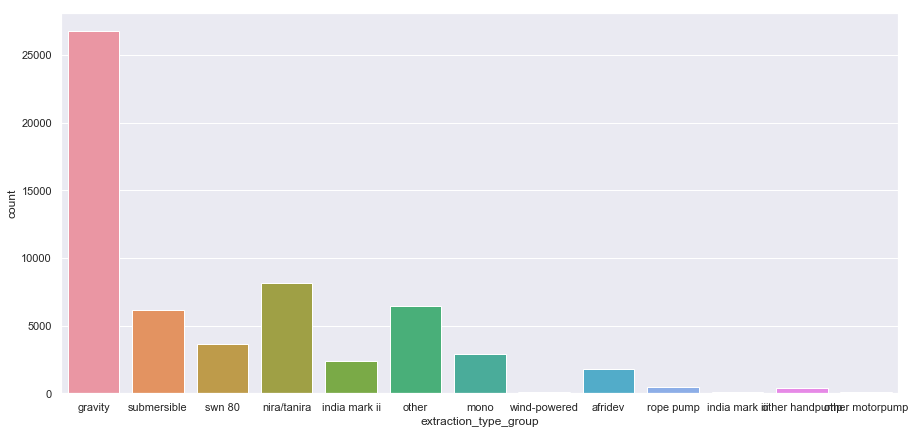

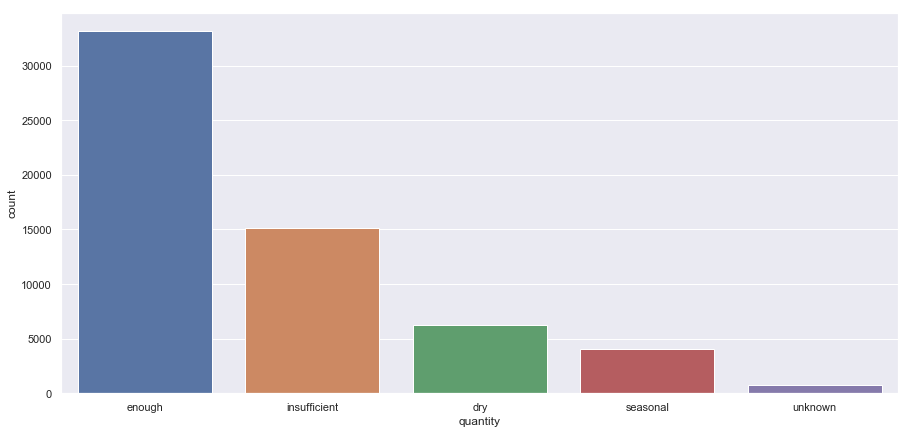

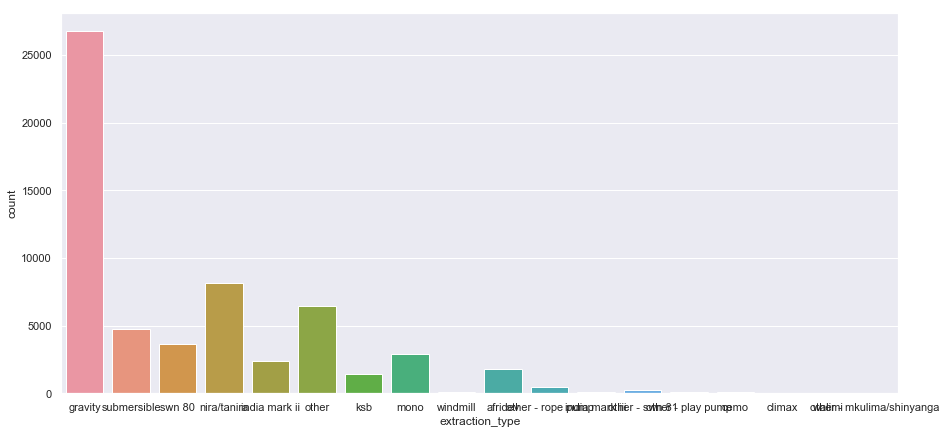

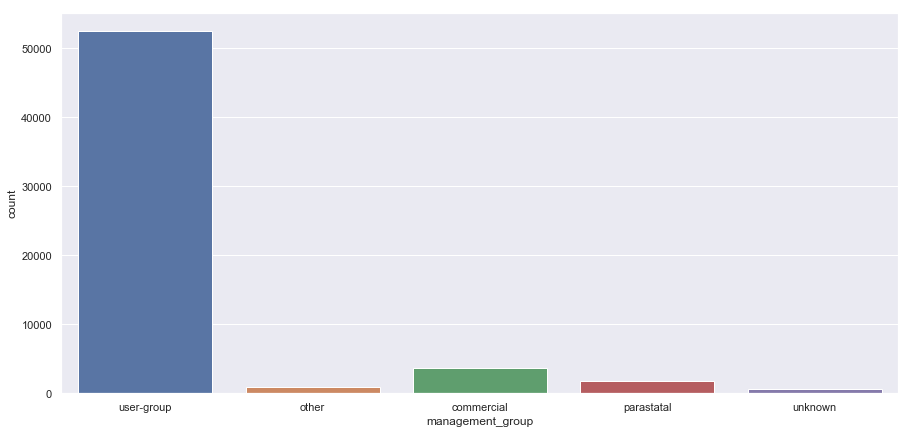

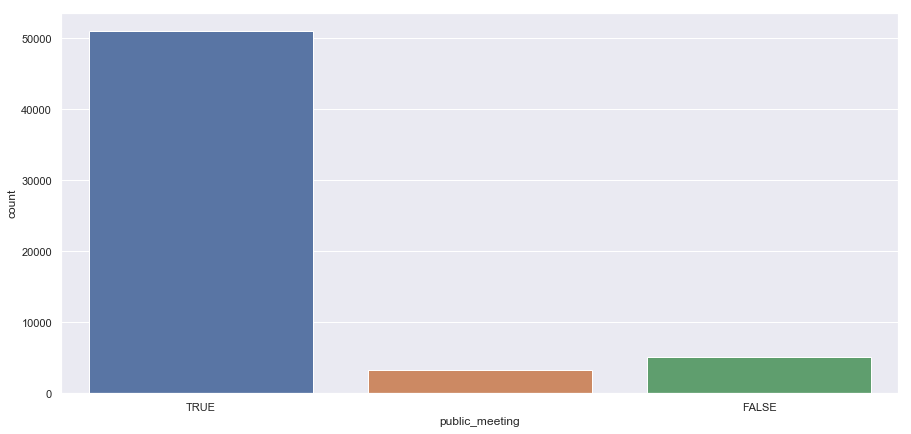

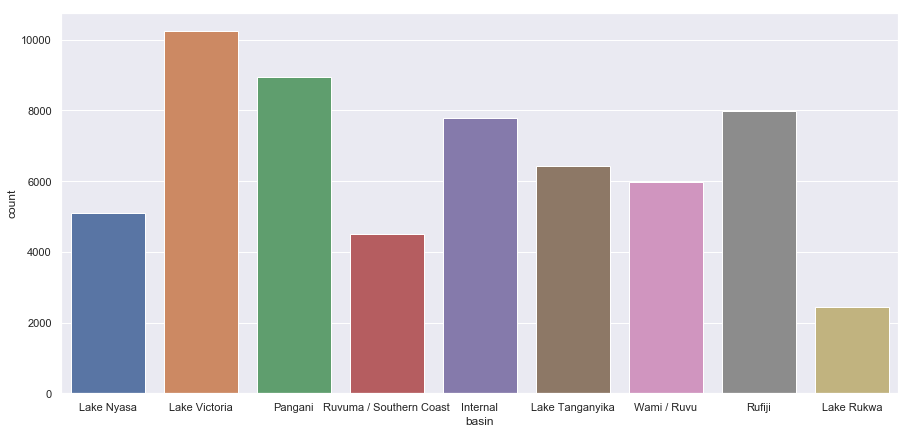

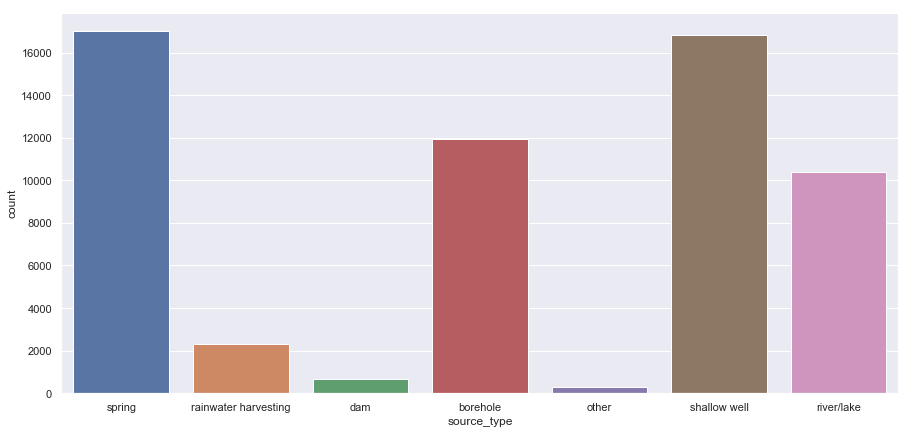

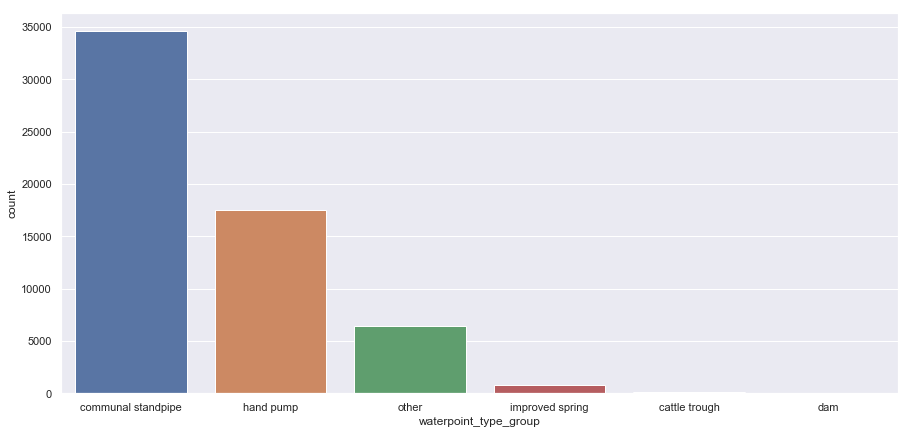

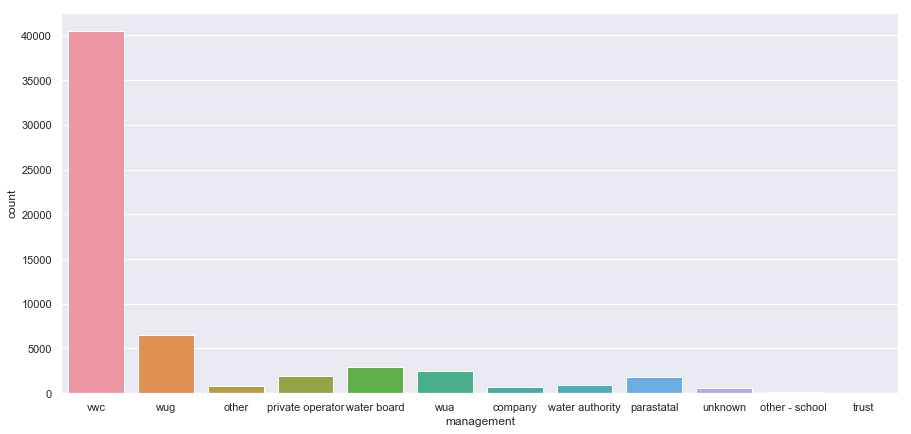

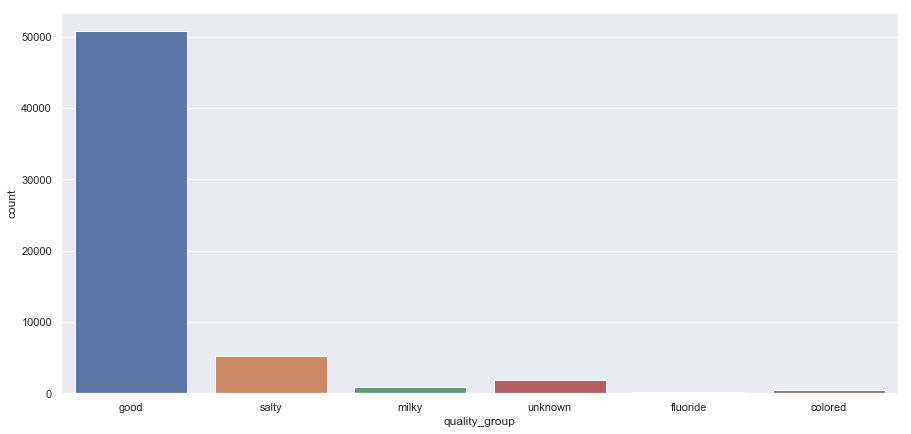

In [0]:
#Print distributions of categorical variables
for col in range(0, len(reduced_cat)):
    hf.categorical_plot(combined_df, reduced_cat, col) 

In [0]:
total_cat = reduced_cat.copy()
# for var in large_drop:
#     combined_df = hf.set_empty(combined_df, var)
#     total_cat.append(combined_df.columns[len(combined_df.columns)-1])

In [0]:
#Scale the status variable
categorical_df = hf.categorical_to_scale(combined_df, 'status_group')
categorical_df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,Increase 2002 - 2012,Pop_Density2012,Population2016,Month_num,Month_y,Temp_Min,Temp_max,rainy_days,total_rain_mm,func_band
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,0.119983,26.511506,984900,3,March,18.3,29.0,7,113.9,2
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,0.279033,80.139246,1924200,3,March,18.3,29.0,7,113.9,2
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,0.373481,32.009591,1618000,2,February,18.6,29.4,9,144.5,2
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,0.130169,76.053501,1334600,1,January,18.6,29.4,10,133.7,0
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,0.372085,97.289650,2789600,7,July,13.6,26.5,0,0.0,2


<Figure size 1080x504 with 0 Axes>

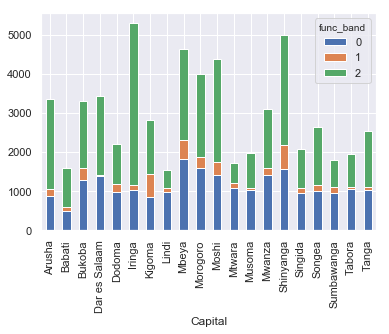

<Figure size 1080x504 with 0 Axes>

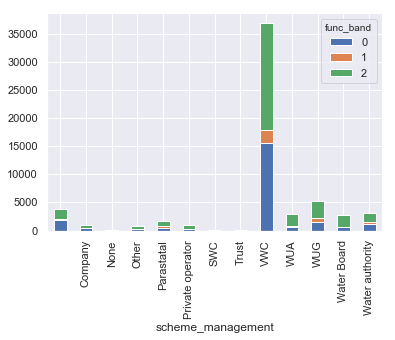

<Figure size 1080x504 with 0 Axes>

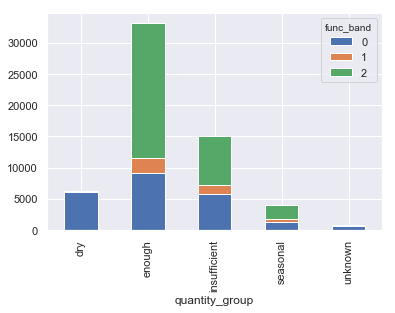

<Figure size 1080x504 with 0 Axes>

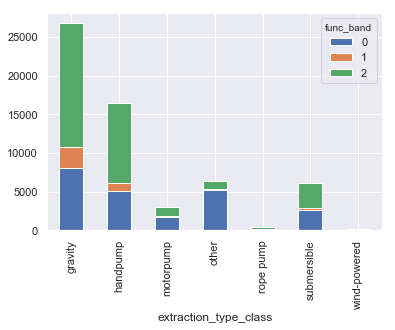

<Figure size 1080x504 with 0 Axes>

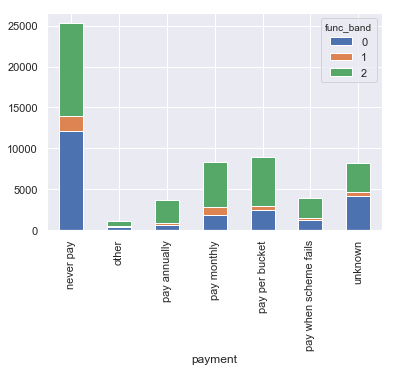

<Figure size 1080x504 with 0 Axes>

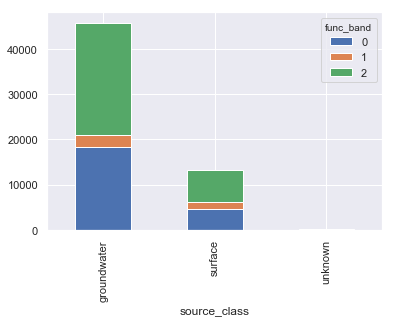

<Figure size 1080x504 with 0 Axes>

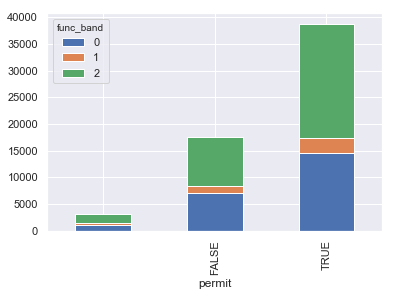

<Figure size 1080x504 with 0 Axes>

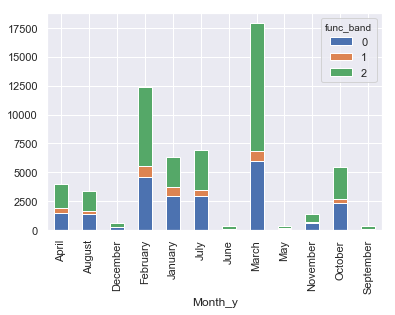

<Figure size 1080x504 with 0 Axes>

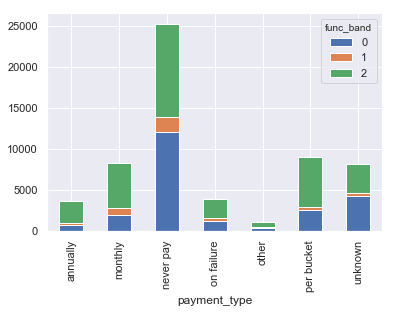

<Figure size 1080x504 with 0 Axes>

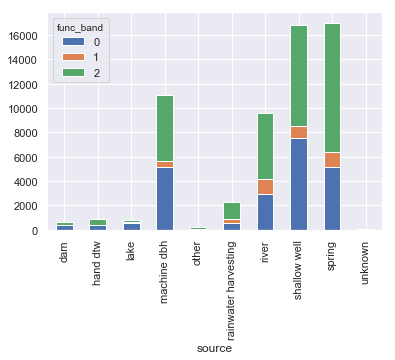

<Figure size 1080x504 with 0 Axes>

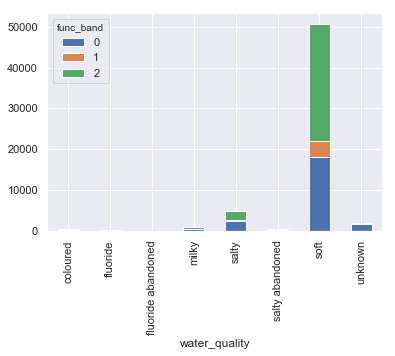

<Figure size 1080x504 with 0 Axes>

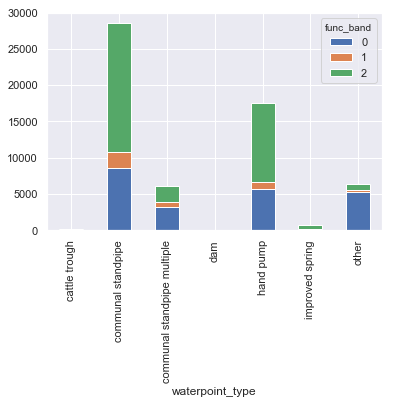

<Figure size 1080x504 with 0 Axes>

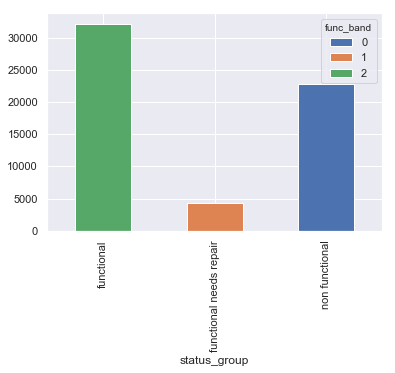

<Figure size 1080x504 with 0 Axes>

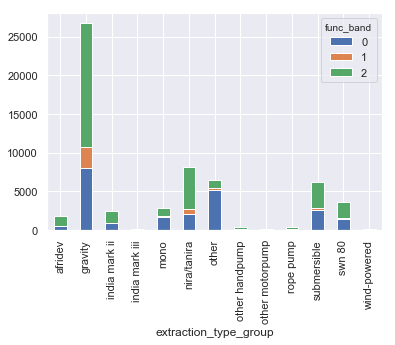

<Figure size 1080x504 with 0 Axes>

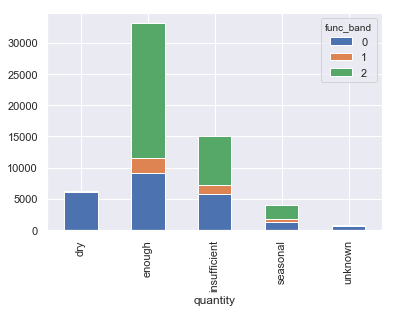

<Figure size 1080x504 with 0 Axes>

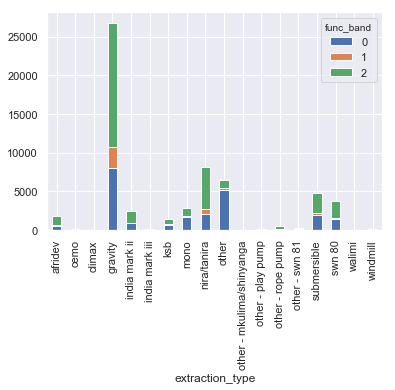

<Figure size 1080x504 with 0 Axes>

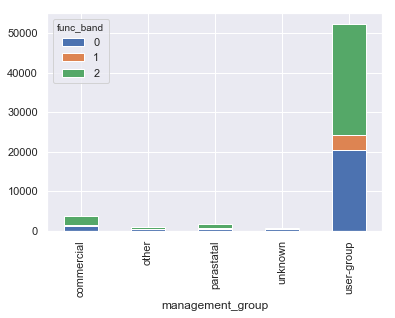

<Figure size 1080x504 with 0 Axes>

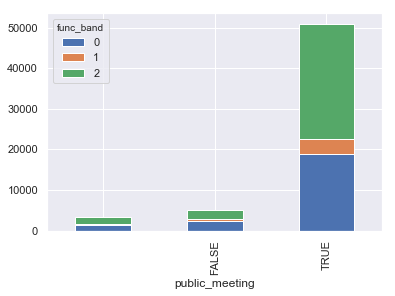

<Figure size 1080x504 with 0 Axes>

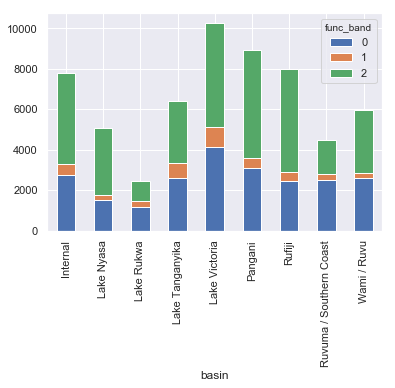

<Figure size 1080x504 with 0 Axes>

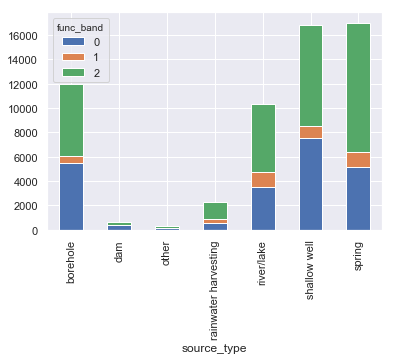

<Figure size 1080x504 with 0 Axes>

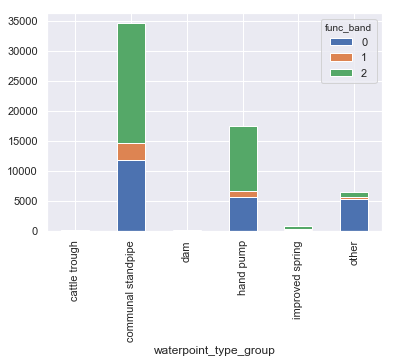

<Figure size 1080x504 with 0 Axes>

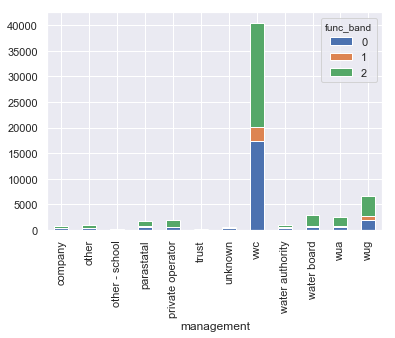

<Figure size 1080x504 with 0 Axes>

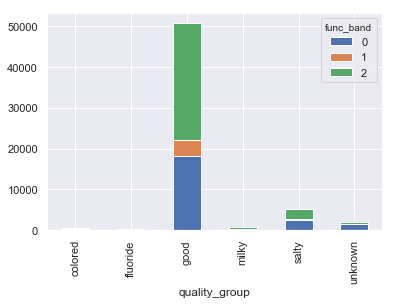

In [0]:
target = 'func_band'
for var in total_cat:
    hf.cat_stacked_bar(categorical_df, target ,var)

In [0]:
#Create dummy variables for categorical variables
reduced_cat.remove('status_group')
categorical_df = categorical_df.drop('status_group', axis = 1)

encoded_df = hf.onehot_encode(categorical_df, reduced_cat)
encoded_df = encoded_df.drop(large_drop, axis = 1)
encoded_df = encoded_df.drop(small_drop, axis = 1)

#Keep track of boolean variables after encoding
booleans = hf.boolean_features(encoded_df)
encoded_df.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,management_water authority,management_water board,management_wua,management_wug,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,...,0,0,0,0,0,0,1,0,0,0
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,...,0,0,0,1,0,0,1,0,0,0
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,...,0,0,0,0,0,0,1,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,...,0,0,0,0,0,0,1,0,0,0
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
# Extract the data we're interested in
lat = encoded_df['latitude'].values
lon = encoded_df['longitude'].values
amount = encoded_df['amount_tsh'].values
population = encoded_df['population'].values
scale_target= encoded_df[target].values

lat_med = stat.median(encoded_df['latitude'].values)
lon_med = stat.median(encoded_df['longitude'].values)

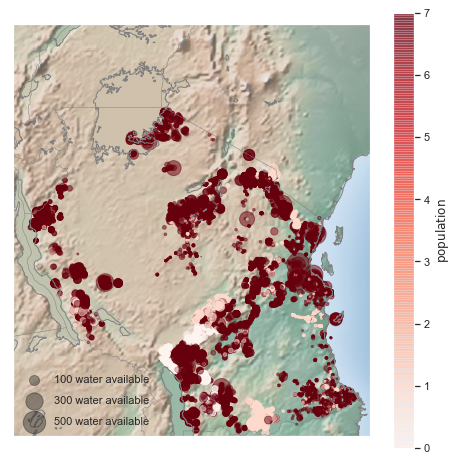

In [0]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=lat_med, lon_0=lon_med,
            width=1.3E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting amount of water available
m.scatter(lon, lat, latlon=True, c=population, cmap = 'Reds', 
          s=np.sqrt(amount), alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\rm population}$')
plt.clim(0, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.4, s=a,
                label=str(a) + ' water available')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

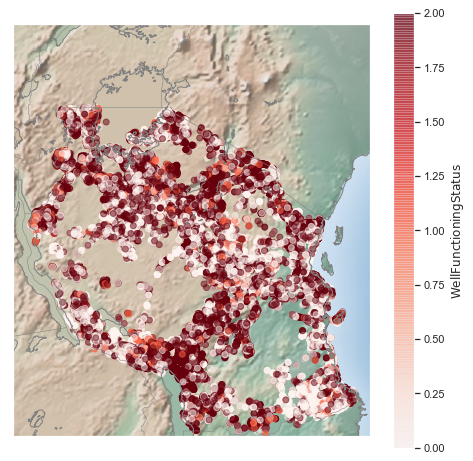

In [0]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=lat_med, lon_0=lon_med,
            width=1.3E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting well status
m.scatter(lon, lat, latlon=True, c=scale_target, cmap = 'Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\rm Well Functioning Status}$')
plt.clim(0, 2)

In [0]:
prepared = encoded_df.copy()
prepared[scaled_numerics] = hf.fix_skewness(encoded_df[scaled_numerics])
prepared = hf.standardize(prepared, scaled_numerics)
prepared.head()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Helper_Function.py:188: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  standardized_numericals = preprocessing.scale(df[numerical_values])
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,management_water authority,management_water board,management_wua,management_wug,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown
0,69572,2.637948,1.041252,0.131052,-1.408791,-0.113292,0.078267,0.659372,0.488854,0.733857,...,0,0,0,0,0,0,1,0,0,0
1,8776,-0.604916,1.054237,0.094610,1.207934,-0.113292,0.749225,-0.512172,1.006078,0.745416,...,0,0,0,1,0,0,1,0,0,0
2,34310,0.667488,0.025541,0.515158,0.639751,-0.113292,0.804053,0.397653,0.937982,0.744365,...,0,0,0,0,0,0,1,0,0,0
3,67743,-0.604916,-0.584751,0.671308,-1.849720,-0.113292,2.410081,2.355412,0.200107,0.720196,...,0,0,0,0,0,0,1,0,0,0
4,19728,-0.604916,-0.964200,-0.448669,1.317271,-0.113292,0.630778,-1.466710,-0.960848,-1.366788,...,0,0,0,0,0,0,1,0,0,0


In [0]:
# Split into train and test sets
size = 0.20
seed = 12345
target_metric = 'accuracy'

features = list(prepared)
features.remove(target)

dependent_var = [target]
X = prepared.loc[:, features]
y = prepared.loc[:, dependent_var]

In [0]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=seed)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


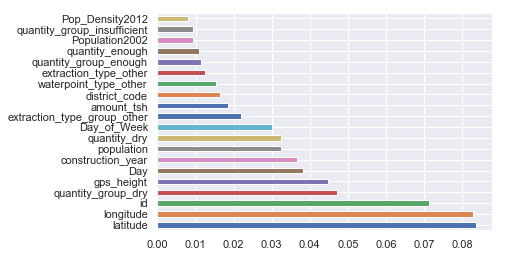

In [0]:
# fit baseline model
baseline = RandomForestClassifier()
baseline = baseline.fit(X_train,y_train)

y_pred = baseline.predict(X_test) 

(pd.Series(baseline.feature_importances_, index=X.columns)
   .nlargest(20)
   .plot(kind='barh')) 

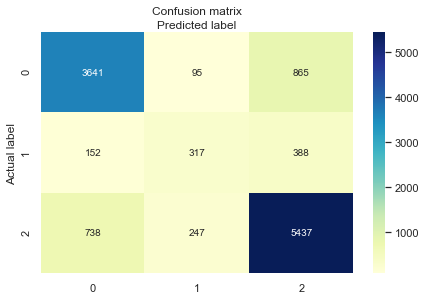

In [0]:
hf.confusion_heat_map(y_test, y_pred)

In [0]:
print('BASE LINE:')
print('Accuracy of Logistic Regression classifier on hold-out set: {:.2f}'.format(baseline.score(X_test, y_test)))
accuracy = cross_val_score(baseline, X, y.values.ravel(), scoring='accuracy', cv=10) 
print('Mean Accuracy after CV: {:.3f} +/- {:.03f}'.format(np.mean(accuracy), np.std(accuracy)))
print('Best Accuracy after CV: {:.3f}'.format(max(accuracy)))
print()
print(classification_report(y_test, y_pred))

BASE LINE:
Accuracy of Logistic Regression classifier on hold-out set: 0.79
Mean Accuracy after CV: 0.792 +/- 0.006
Best Accuracy after CV: 0.804

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4601
           1       0.48      0.37      0.42       857
           2       0.81      0.85      0.83      6422

   micro avg       0.79      0.79      0.79     11880
   macro avg       0.70      0.67      0.68     11880
weighted avg       0.79      0.79      0.79     11880



## Principal Component Analysis

Text(0, 0.5, 'cumulative explained variance')

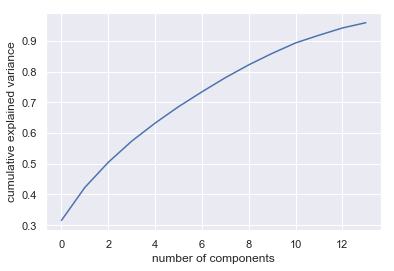

In [0]:
#Create PCA object for 14 components
pca = PCA(n_components = 14, random_state = seed)
pca.fit(X_train)

#Apply PCA to X train set and join with Y train set
X_pca_train = pd.DataFrame(pca.fit_transform(X_train[scaled_numerics]))
PCA_train = X_pca_train.join(y_train)

#Apply PCA to X test set
X_pca_test = pd.DataFrame(pca.fit_transform(X_test[scaled_numerics]))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [0]:
# #Analyze different PCA combinations
# PCA_num = 10
# for x in range(0,PCA_num):
#     for y in range(1,PCA_num):
#         if x != y:
#             hf.pca_analysis(PCA_train, target, pca_1 = x, pca_2 = y, labels=[0,1,2], 
#             labl={0:'Non-Functional',1:'Repair',2:'Functional'})


## Identifying Functional Wells

In [0]:
y_functional_train = pd.DataFrame([1 if value == 2 else 0 for value in y_train.iloc[:,0]])
y_functional_train.columns = ['functional']

y_functional_test = pd.DataFrame([1 if value == 2 else 0 for value in y_test.iloc[:,0]])
y_functional_test.columns = ['functional']

y_functional_train.head()

,functional
0,1
1,0
2,0
3,1
4,1


In [0]:
#Combine PCA variables with boolean for first level training
level_bools = hf.boolean_features(X_train)

X_train_bool = X_train.loc[:,level_bools].copy()
X_test_bool = X_test.loc[:,level_bools].copy()
                             
X_functional_train = pd.concat([X_train_bool.reset_index(drop=True), X_pca_train], axis=1)
X_functional_test = pd.concat([X_test_bool.reset_index(drop=True), X_pca_test], axis=1)

X_functional_train.head()

,Capital_Arusha,Capital_Babati,Capital_Bukoba,Capital_Dar es Salaam,Capital_Dodoma,Capital_Iringa,Capital_Kigoma,Capital_Lindi,Capital_Mbeya,Capital_Morogoro,...,4,5,6,7,8,9,10,11,12,13
0,1,0,0,0,0,0,0,0,0,0,...,-1.034163,-0.142411,-1.982077,1.050799,0.294603,-0.167998,-1.159347,-1.291370,-0.252088,-0.634890
1,0,0,0,0,0,1,0,0,0,0,...,-0.185406,0.095822,0.895618,1.025440,-0.727137,-0.443937,-1.358865,0.048269,0.870268,1.011136
2,0,0,0,0,0,0,0,0,0,0,...,-1.784924,-0.801398,-1.172585,1.602718,1.438263,-0.268572,0.501805,-0.576936,-0.592059,0.124867
3,0,0,0,0,0,0,0,0,0,1,...,0.159320,-0.028794,-0.718997,-1.271275,0.972106,-0.636835,-0.064013,-0.070415,1.624621,-0.182547
4,1,0,0,0,0,0,0,0,0,0,...,-0.022984,-0.529791,-0.369493,1.260342,0.337424,-1.511941,-1.046100,-0.584955,-0.210080,-0.088266


In [0]:
func_model_1 = GradientBoostingClassifier()
func_model_2 = RandomForestClassifier()
func_model_3 = KNeighborsClassifier()

models = [('et', func_model_1), ('rf', func_model_2), ('kn', func_model_3)]

stack = StackingTransformer(estimators=models, regression=False, n_folds=5, shuffle=True, 
                            random_state=seed, verbose = 2)  

In [0]:
stack = stack.fit(X_functional_train, y_functional_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [3]

estimator  0: [et: GradientBoostingClassifier]
    fold  0:  [0.76073232]
    fold  1:  [0.77009680]
    fold  2:  [0.76241582]
    fold  3:  [0.76441498]
    fold  4:  [0.75841751]
    ----
    MEAN:     [0.76321549] + [0.00396529]

estimator  1: [rf: RandomForestClassifier]
    fold  0:  [0.78956229]
    fold  1:  [0.79577020]
    fold  2:  [0.79513889]
    fold  3:  [0.79692761]
    fold  4:  [0.78672138]
    ----
    MEAN:     [0.79282407] + [0.00396886]

estimator  2: [kn: KNeighborsClassifier]
    fold  0:  [0.78640572]
    fold  1:  [0.79692761]
    fold  2:  [0.79166667]
    fold  3:  [0.79177189]
    fold  4:  [0.78335438]
    ----
    MEAN:     [0.79002525] + [0.00471146]



In [0]:
S_train = stack.transform(X_functional_train)

Train set was detected.
Transforming...

estimator  0: [et: GradientBoostingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  1: [rf: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  2: [kn: KNeighborsClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE



In [0]:
S_test = stack.transform(X_functional_test)

Transforming...

estimator  0: [et: GradientBoostingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  1: [rf: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  2: [kn: KNeighborsClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


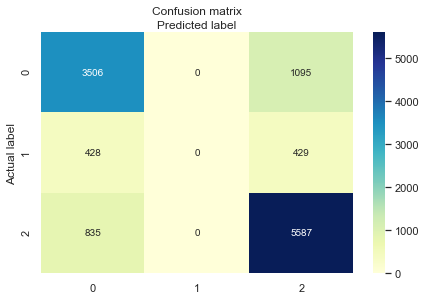

In [0]:
final_model = GradientBoostingClassifier(random_state=seed, learning_rate=0.1, n_estimators=100, max_depth=3)
    
final_model = final_model.fit(S_train, y_train)
y_pred = final_model.predict(S_test)

hf.confusion_heat_map(y_test, y_pred)

In [0]:
print('BASE LINE:')
print('Accuracy of Gradient Boosting classifier on hold-out set: {:.2f}'.format(final_model.score(S_test, y_test)))

BASE LINE:
Accuracy of Gradient Boosting classifier on hold-out set: 0.77


## Test Data Processing and Modeling

In [0]:
#Parse date 
raw_test_df['date_recorded'] = pd.to_datetime(raw_test_df['date_recorded'])
raw_test_df['Year'], raw_test_df['Month'], raw_test_df['Day'], raw_test_df['Day_of_Week'] = raw_test_df['date_recorded'].dt.year, raw_test_df['date_recorded'].dt.month,raw_test_df['date_recorded'].dt.day,raw_test_df['date_recorded'].dt.weekday
raw_test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Year,Month,Day,Day_of_Week
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,2013,2,4,0
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2013,2,4,0
2,17168,0.0,2013-02-01,,1567,,34.767863,-5.004344,Puma Secondary,0,...,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,2013,2,1,4
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,dry,shallow well,shallow well,groundwater,other,other,2013,1,22,1
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,3,27,2


In [0]:
combined_test_df = pd.merge(raw_test_df, pop_df, how = 'left', left_on = 'region', 
                            right_on = 'Name')
combined_test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,Name,Abbr.,Status,Capital,Area_KM2,Population2002,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,Manyara,MAY,Reg,Babati,44522,1037605,1425131,0.373481,32.009591,1618000
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,Arusha,ARU,Reg,Arusha,37576,1288088,1694310,0.315368,45.090217,1890700
2,17168,0.0,2013-02-01,,1567,,34.767863,-5.004344,Puma Secondary,0,...,Singida,SIN,Reg,Singida,49340,1086748,1370637,0.261228,27.779428,1504000
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,Lindi,LIN,Reg,Lindi,66040,787624,864652,0.097798,13.092853,897500
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,Ruvuma,RUV,Reg,Songea,63669,1113715,1376891,0.236305,21.625768,1498800


In [0]:
combined_test_df = pd.merge(combined_test_df, weather_df, how = 'left', left_on = 'Month', 
                       right_on = 'Month_num')
combined_test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016,Month_num,Month_y,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,1425131,0.373481,32.009591,1618000,2,February,18.6,29.4,9,144.5
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,1694310,0.315368,45.090217,1890700,2,February,18.6,29.4,9,144.5
2,17168,0.0,2013-02-01,,1567,,34.767863,-5.004344,Puma Secondary,0,...,1370637,0.261228,27.779428,1504000,2,February,18.6,29.4,9,144.5
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,864652,0.097798,13.092853,897500,1,January,18.6,29.4,10,133.7
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,1376891,0.236305,21.625768,1498800,3,March,18.3,29.0,7,113.9


In [0]:
impute_col = ['amount_tsh', 'population', 'Year', 'construction_year', 'Area_KM2', 'rainy_days', 
              'total_rain_mm']
for col in impute_col:
    combined_test_df.loc[combined_test_df[col] <= 0, col] = 0
    
combined_test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,Population2012,Increase 2002 - 2012,Pop_Density2012,Population2016,Month_num,Month_y,Temp_Min,Temp_max,rainy_days,total_rain_mm
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,1425131,0.373481,32.009591,1618000,2,February,18.6,29.4,9,144.5
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,1694310,0.315368,45.090217,1890700,2,February,18.6,29.4,9,144.5
2,17168,0.0,2013-02-01,,1567,,34.767863,-5.004344,Puma Secondary,0,...,1370637,0.261228,27.779428,1504000,2,February,18.6,29.4,9,144.5
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,864652,0.097798,13.092853,897500,1,January,18.6,29.4,10,133.7
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,1376891,0.236305,21.625768,1498800,3,March,18.3,29.0,7,113.9


In [0]:
#cat.remove('status_group')
reduced_cat, large_drop, small_drop = hf.drop_categorical(combined_test_df, cat, upper_bound = up, 
                                                          lower_bound = low)

The following categories have too many unique values: ['Name', 'wpt_name', 'scheme_name', 'funder', 'installer', 'date_recorded', 'subvillage', 'lga', 'ward', 'Abbr.', 'region']
The following categories have too few unique values: ['recorded_by', 'Status']


In [0]:
# test_total_cat = reduced_cat.copy()
# for var in large_drop:
#     combined_df = hf.set_empty(combined_test_df, var)
#     test_total_cat.append(combined_test_df.columns[len(combined_test_df.columns)-1])

In [0]:
#Create dummy variables for categorical variables
encoded_test_df = hf.onehot_encode(combined_test_df, reduced_cat)
encoded_test_df = encoded_test_df.drop(large_drop, axis = 1)
encoded_test_df = encoded_test_df.drop(small_drop, axis = 1)

encoded_test_df.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,management_water authority,management_water board,management_wua,management_wug,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown
0,50785,0.0,1996,35.290799,-4.059696,0,21,3,321,2012,...,0,0,0,0,0,0,1,0,0,0
1,51630,0.0,1569,36.656709,-3.309214,0,2,2,300,2000,...,0,0,0,0,0,0,1,0,0,0
2,17168,0.0,1567,34.767863,-5.004344,0,13,2,500,2010,...,0,0,0,0,0,0,1,0,0,0
3,45559,0.0,267,38.058046,-9.418672,0,80,43,250,1987,...,0,0,0,0,0,0,1,0,0,0
4,49871,500.0,1260,35.006123,-10.950412,0,10,3,60,2000,...,0,1,0,0,0,0,1,0,0,0


In [0]:
#Final prepared test data
prepared_test = encoded_test_df.copy()
prepared_test[scaled_numerics] = hf.fix_skewness(prepared_test[scaled_numerics])
prepared_test = hf.standardize(prepared_test, scaled_numerics)
prepared_test.head()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Helper_Function.py:188: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  standardized_numericals = preprocessing.scale(df[numerical_values])


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,management_water authority,management_water board,management_wua,management_wug,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown
0,50785,-0.604817,1.939784,0.186445,0.552598,-0.114665,0.811367,0.040147,1.089877,0.756161,...,0,0,0,0,0,0,1,0,0,0
1,51630,-0.604817,1.322052,0.393626,0.807803,-0.114665,-1.677532,-0.506605,1.048821,0.743598,...,0,0,0,0,0,0,1,0,0,0
2,17168,-0.604817,1.319159,0.107125,0.231366,-0.114665,0.267686,-0.506605,1.374053,0.754067,...,0,0,0,0,0,0,1,0,0,0
3,45559,-0.604817,-0.561525,0.606182,-1.269746,-0.114665,2.314008,2.221572,0.941117,0.729989,...,0,0,0,0,0,0,1,0,0,0
4,49871,1.753037,0.875028,0.143265,-1.790621,-0.114665,-0.027321,0.040147,0.230608,0.743598,...,0,1,0,0,0,0,1,0,0,0


In [0]:
train_col = X.columns
test_col = prepared_test.columns

X_final_test = prepared_test.copy()
for x in range(0,len(test_col)):
    if train_col[x] != test_col[x] and train_col[x] not in test_col:
        X_final_test[train_col[x]] = 0 * len(X_final_test.index)
        
X_final_test.head()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,...,management_wua,management_wug,quality_group_colored,quality_group_fluoride,quality_group_good,quality_group_milky,quality_group_salty,quality_group_unknown,scheme_management_None,extraction_type_other - mkulima/shinyanga
0,50785,-0.604817,1.939784,0.186445,0.552598,-0.114665,0.811367,0.040147,1.089877,0.756161,...,0,0,0,0,1,0,0,0,0,0
1,51630,-0.604817,1.322052,0.393626,0.807803,-0.114665,-1.677532,-0.506605,1.048821,0.743598,...,0,0,0,0,1,0,0,0,0,0
2,17168,-0.604817,1.319159,0.107125,0.231366,-0.114665,0.267686,-0.506605,1.374053,0.754067,...,0,0,0,0,1,0,0,0,0,0
3,45559,-0.604817,-0.561525,0.606182,-1.269746,-0.114665,2.314008,2.221572,0.941117,0.729989,...,0,0,0,0,1,0,0,0,0,0
4,49871,1.753037,0.875028,0.143265,-1.790621,-0.114665,-0.027321,0.040147,0.230608,0.743598,...,0,0,0,0,1,0,0,0,0,0


In [0]:
# ################################ Uncomment to debug #################################
# #####################################################################################
# #####################################################################################

# train_col = X.columns.sort_values()
# final_col = X_final_test.columns.sort_values()
# for x in range(0,len(final_col)):
#     print(train_col[x], final_col[x], train_col[x] == final_col[x])
    
#     if train_col[x] != final_col[x]:
#         print(train_col[x], final_col[x])


In [0]:
#Apply PCA to X train set and join with Y train set
X_pca_final = pd.DataFrame(pca.fit_transform(X_final_test[scaled_numerics]))

#Combine PCA variables with boolean for first level training
X_final_bool = X_final_test.loc[:,level_bools].copy()
                             
X_functional_final = pd.concat([X_final_bool.reset_index(drop=True), X_pca_final], axis=1)
S_test_final = stack.transform(X_functional_final)

y_final_test_pred = pd.DataFrame(final_model.predict(S_test_final))
y_baseline_test_pred = pd.DataFrame(baseline.predict(X_final_test))

y_final_test_pred.columns = [target]
y_baseline_test_pred.columns = [target]

Transforming...

estimator  0: [et: GradientBoostingClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  1: [rf: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  2: [kn: KNeighborsClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE



In [0]:
final_raw_output = X_final_test.join(y_final_test_pred)
final_raw_output = final_raw_output.loc[:,['id', target]]
final_clean_output = hf.undo_var_scaling(final_raw_output, target,new_col_name = 'status_group',  
                                cat = ['non functional', 'functional needs repair', 'functional'],
                                drop = True)

final_clean_output.to_csv("O-1-6_Submission_FINAL.csv", index=False)
final_clean_output.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,functional
4,49871,non functional


In [0]:
baseline_raw_output = X_final_test.join(y_baseline_test_pred)
baseline_raw_output = baseline_raw_output.loc[:,['id', target]]
baseline_clean_output = hf.undo_var_scaling(baseline_raw_output, target,new_col_name = 'status_group',  
                                cat = ['non functional', 'functional needs repair', 'functional'],
                                drop = True)

baseline_clean_output.to_csv("O-1-6_Submission_BASELINE.csv", index=False)
baseline_clean_output.head()

In [0]:
######################## Hide code in final report output ########################
##################################################################################
##################################################################################

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# The raw code for this IPython notebook is by default hidden for easier reading.
# To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')